# 环境说明

In [1]:
# 安装所需的包
install.packages("survival")
install.packages("survminer")

package 'survival' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'survival'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\software\R-4.4.1\library\00LOCK\survival\libs\x64\survival.dll to D:\software\R-4.4.1\library\survival\libs\x64\survival.dll: Permission denied"
Warning message:
"restored 'survival'"



The downloaded binary packages are in
	C:\Users\AFAN\AppData\Local\Temp\RtmpKEZq3D\downloaded_packages
package 'survminer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AFAN\AppData\Local\Temp\RtmpKEZq3D\downloaded_packages


In [2]:
sessionInfo()$otherPkgs$survival

NULL

In [3]:
sessionInfo()$otherPkgs$survminer

NULL

# 代码实现

In [4]:
# 加载所需的包
library(survival)
library(survminer)

Warning message:
"package 'survival' was built under R version 4.4.2"
Warning message:
"package 'survminer' was built under R version 4.4.2"
Loading required package: ggplot2

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.4.2"

Attaching package: 'survminer'


The following object is masked from 'package:survival':

    myeloma




In [5]:
# 读取数据
data <- read.csv("data/Cox_dataset.csv")

# 创建生存对象
surv_obj <- Surv(data$T, data$E)

# 进行Cox回归分析
# 假设 var1, var2, var3 是协变量
cox_model <- coxph(surv_obj ~ var1 + var2 + var3, data = data)

# 输出Cox回归分析结果
summary(cox_model)

Call:
coxph(formula = surv_obj ~ var1 + var2 + var3, data = data)

  n= 200, number of events= 189 

        coef exp(coef) se(coef)     z Pr(>|z|)   
var1 0.22221   1.24883  0.07429 2.991  0.00278 **
var2 0.05096   1.05228  0.08289 0.615  0.53871   
var3 0.21831   1.24398  0.07580 2.880  0.00398 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     exp(coef) exp(-coef) lower .95 upper .95
var1     1.249     0.8007    1.0796     1.445
var2     1.052     0.9503    0.8945     1.238
var3     1.244     0.8039    1.0722     1.443

Concordance= 0.58  (se = 0.025 )
Likelihood ratio test= 15.54  on 3 df,   p=0.001
Wald test            = 17.76  on 3 df,   p=5e-04
Score (logrank) test = 17.95  on 3 df,   p=5e-04


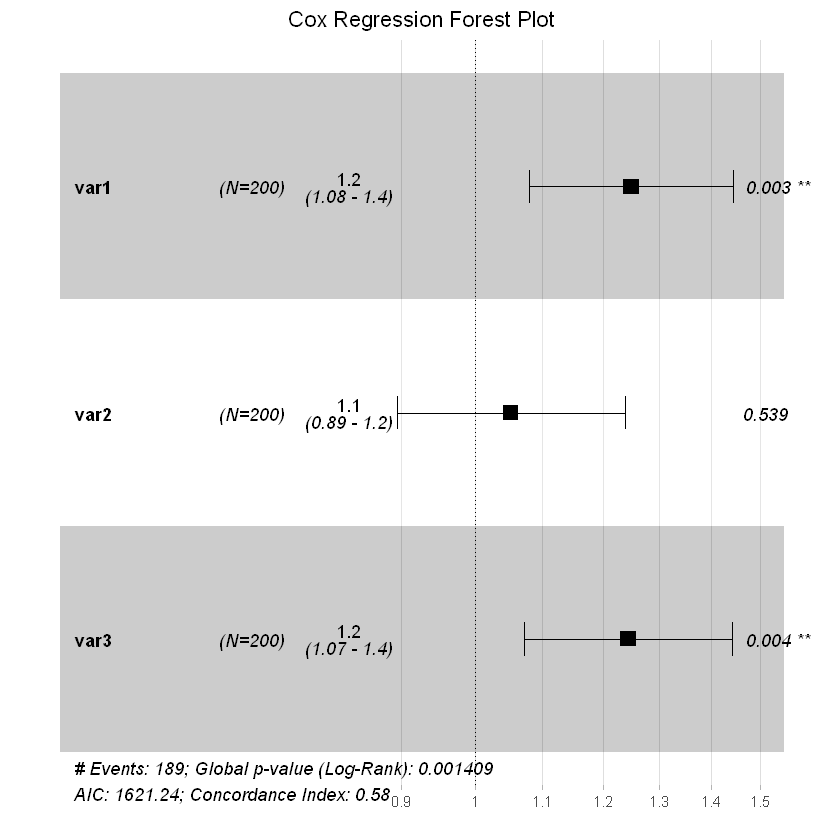

In [10]:
# 绘制森林图
ggforest(cox_model, 
         data = data, 
         main = "Cox Regression Forest Plot",
         fontsize = 1,
         noDigits = 2)